# HW1_ex_3_1

In [51]:
import numpy as np

def BinaryCrossEntropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -np.mean(term_0+term_1, axis=0)

def sigmoid(x):

    return  1/(1+np.exp(-x))

# input
p = np.array([[[1], [1], [2], [2],[3],[3], [4], [4]],
              [[4], [5], [4], [5],[1],[2], [1], [2]]])

label = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# defining weights and biases for first layer

W = np.array([[10,10]])
b = np.array([[10]])

epoch=14
alpha=0.1

# Train

for i in range(epoch):

    for j in range(p.shape[1]):

        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)
        e = label[j]-a
        s = e # for binary cross entropy in output layer
        dw = alpha*s*p[:,j,:].T
        db = alpha*s
        W = W + dw
        b = b + db


# Test and accuracy
correct=0
for j in range(p.shape[1]):

    n = np.matmul(W,p[:,j,:])+b
    a = sigmoid(n)
    print(a)
    if (np.abs(label[j]-a)[0])<0.1:
            correct+=1

# accuracy
accuracy = (correct/8)*100       

print(f"the accuracy for {epoch} epoch is: {accuracy}")





[[0.00068756]]
[[6.15059992e-06]]
[[0.08423737]]
[[0.00082162]]
[[0.99999994]]
[[0.9999935]]
[[1.]]
[[0.99999995]]
the accuracy for 14 epoch is: 100.0


# HW1_ex_3_2

In [30]:
import numpy as np

def Hardlim(inputs):
        output = np.zeros((inputs.shape))
        output[np.where(inputs>0)] = 1
        return output

def BinaryCrossEntropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    term_0 = (1-y_true) * np.log(1-y_pred + 1e-7)
    term_1 = y_true * np.log(y_pred + 1e-7)
    return -np.mean(term_0+term_1, axis=0)

def sigmoid(x):

    return  1/(1+np.exp(-x))

# input
p = np.array([[[-1], [-1], [0], [1],[2],[2], [1], [0]],
              [[1], [0], [2], [2],[0],[1], [-1], [-1]]])

label = np.array([[[1], [1], [0], [0], [0], [0], [0], [0]],
                  [[0], [0], [1], [1], [0], [0], [0], [0]],
                  [[0], [0], [0], [0], [1], [1], [0], [0]],
                  [[0], [0], [0], [0], [0], [0], [1], [1]],])

# defining weights and biases for first layer

W = np.ones((4,2))
b = np.ones((4,1))

## accuracy function 
def acc_calc(p,W,b,label):
    
    correct_t=0
    for j in range(p.shape[1]):
        correct=0
        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)

        diff=np.abs(label[:,j,:]-a)
        
        
        for i in diff:
            
            if i<=0.1:
                
                correct += 1
        
        if correct==label.shape[0]:
            correct_t+=1
        

    # accuracy
    accuracy = (correct_t/8)*100 
    return accuracy   

# Train
epoch = 0
alpha = 0.9
accuracy = 0
while accuracy<100.0:
  
    for j in range(p.shape[1]):

        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)
        e = label[:,j,:]-a
        s = e # for binary cross entropy in output layer
        dw = alpha*s*p[:,j,:].T
        db = alpha*s
        W = W + dw
        b = b + db
    
    accuracy = acc_calc(p,W,b,label)
    
    epoch += 1
    print(f"accuracy for epoch{epoch} is {accuracy}")


# test
p1 = np.array([[[0], [0], [1], [-2]],
              [[0], [1], [-2], [5]]])
for j in range(p1.shape[1]):

        n = np.matmul(W,p1[:,j,:])+b
        a = sigmoid(n)
        print(f"output for {p1[:,j,:]} is:\n") 
        print(f"{a}\n")



accuracy for epoch1 is 0.0
accuracy for epoch2 is 0.0
accuracy for epoch3 is 0.0
accuracy for epoch4 is 0.0
accuracy for epoch5 is 0.0
accuracy for epoch6 is 0.0
accuracy for epoch7 is 0.0
accuracy for epoch8 is 0.0
accuracy for epoch9 is 0.0
accuracy for epoch10 is 0.0
accuracy for epoch11 is 12.5
accuracy for epoch12 is 25.0
accuracy for epoch13 is 25.0
accuracy for epoch14 is 50.0
accuracy for epoch15 is 50.0
accuracy for epoch16 is 62.5
accuracy for epoch17 is 62.5
accuracy for epoch18 is 62.5
accuracy for epoch19 is 62.5
accuracy for epoch20 is 62.5
accuracy for epoch21 is 62.5
accuracy for epoch22 is 62.5
accuracy for epoch23 is 62.5
accuracy for epoch24 is 62.5
accuracy for epoch25 is 62.5
accuracy for epoch26 is 62.5
accuracy for epoch27 is 62.5
accuracy for epoch28 is 62.5
accuracy for epoch29 is 75.0
accuracy for epoch30 is 87.5
accuracy for epoch31 is 87.5
accuracy for epoch32 is 87.5
accuracy for epoch33 is 87.5
accuracy for epoch34 is 87.5
accuracy for epoch35 is 87.5
accu

In [21]:
W,b

(array([[ 2.24939524, -2.24233427],
        [-0.10102223, -0.04832179]]),
 array([[0.02812237],
        [0.07591377]]))

# HW1_ex_3_3

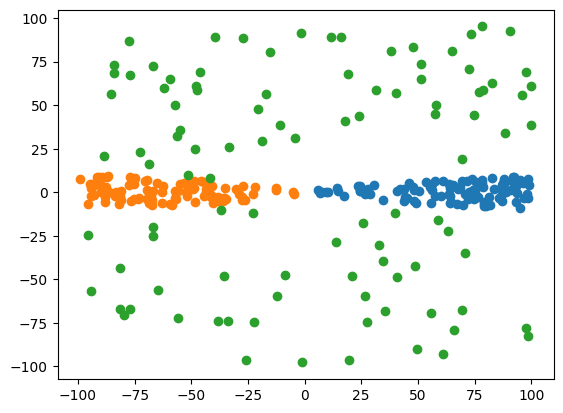

In [34]:
from matplotlib import pyplot as plt
import numpy as np

p1 = np.linspace(-100, 100,2000)
p2 = np.linspace(-100, 100,2000)
p1v, p2v = np.meshgrid(p1, p2)
i1,j1=np.where(p1v**2 < p2v-2)
i2,j2=np.where(-p1v**2 > p2v+2)
i3,j3 = np.where((p1v**2 >= p2v-2)  & (-p1v**2 <= p2v+2) )

rand_ind1 = np.random.randint(0,len(i1),100)
rand_ind2 = np.random.randint(0,len(i2),100)
rand_ind3 = np.random.randint(0,len(i3),100)


plt.scatter(p1[i1[rand_ind1]],p2[j1[rand_ind1]])
plt.scatter(p1[i2[rand_ind2]],p2[j2[rand_ind2]])
plt.scatter(p1[i3[rand_ind3]],p2[j3[rand_ind3]])


In [36]:

def sigmoid(x):

    return  1/(1+np.exp(-x))

# input and its labels
D1 = np.array([[p1[i1[rand_ind1]],p2[j1[rand_ind1]]]])
D2 = np.array([[p1[i2[rand_ind2]],p2[j2[rand_ind2]]]])
D3 = np.array([[p1[i3[rand_ind3]],p2[j3[rand_ind3]]]])
p =np.concatenate((D1,D2,D3),axis=2)
p = p.reshape((2,300,1))

label=np.zeros((3,300,1))
label[:,0:100,:]=np.array([[[1]],[[0]],[[0]]])
label[:,100:200,:]=np.array([[[0]],[[1]],[[0]]])
label[:,200:300,:]=np.array([[[0]],[[0]],[[1]]])
label[:,0,:].shape

# defining weights and biases for first layer

W = np.ones((3,2))
b = np.ones((3,1))

## accuracy function 
def acc_calc(p,W,b,label):
    
    correct_t=0
    for j in range(p.shape[1]):
        correct=0
        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)

        diff=np.abs(label[:,j,:]-a)
        
        
        for i in diff:
            
            if i<=0.1:
                
                correct += 1
        
        if correct==label.shape[0]:
            correct_t+=1
        

    # accuracy
    accuracy = (correct_t/300)*100 
    return accuracy   


# Train
epoch = 0
alpha = 0.1
accuracy = 0
while accuracy<=90.0:
  
    for j in range(p.shape[1]):

        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)
        e = label[:,j,:]-a
        s = e # for binary cross entropy in output layer
        dw = alpha*s*p[:,j,:].T
        db = alpha*s
        W = W + dw
        b = b + db
    
    accuracy = acc_calc(p,W,b,label)
    epoch += 1
    print(f"accuracy for epoch {epoch} is {accuracy}")


# test
p1 = np.array([[[0], [0], [1], [-2]],
              [[0], [1], [-2], [5]]])
for j in range(p1.shape[1]):

        n = np.matmul(W,p1[:,j,:])+b
        a = sigmoid(n)
        print(f"output for {p1[:,j,:]} is:\n") 
        print(f"{a}\n")


C:\Users\TUF\AppData\Local\Temp\ipykernel_29464\2941719307.py:3: RuntimeWarning: overflow encountered in exp
  return  1/(1+np.exp(-x))


accuracy for epoch 1 is 15.333333333333332
accuracy for epoch 2 is 15.666666666666668
accuracy for epoch 3 is 16.333333333333332
accuracy for epoch 4 is 12.666666666666668
accuracy for epoch 5 is 15.333333333333332
accuracy for epoch 6 is 15.0
accuracy for epoch 7 is 16.0
accuracy for epoch 8 is 14.666666666666666
accuracy for epoch 9 is 48.66666666666667
accuracy for epoch 10 is 16.666666666666664
accuracy for epoch 11 is 16.333333333333332
accuracy for epoch 12 is 20.666666666666668
accuracy for epoch 13 is 17.0
accuracy for epoch 14 is 16.666666666666664
accuracy for epoch 15 is 17.333333333333336
accuracy for epoch 16 is 17.0
accuracy for epoch 17 is 16.666666666666664
accuracy for epoch 18 is 16.666666666666664
accuracy for epoch 19 is 12.666666666666668
accuracy for epoch 20 is 14.666666666666666
accuracy for epoch 21 is 44.0
accuracy for epoch 22 is 17.666666666666668
accuracy for epoch 23 is 16.0
accuracy for epoch 24 is 16.666666666666664
accuracy for epoch 25 is 25.6666666666

KeyboardInterrupt: 

In [37]:
W,b

(array([[ 17.23438993,  -0.82780802],
        [-15.23787447,   0.52816589],
        [  9.23356066,  -0.54838576]]),
 array([[-185.796742  ],
        [-314.85355783],
        [ 184.97448836]]))

In [21]:
# test
p1 = np.array([[[10]],
               [[20]]])
for j in range(p1.shape[1]):

        n = np.matmul(W,p1[:,j,:])+b
        a = sigmoid(n)
        print(f"output for {p1[:,j,:]} is:\n") 
        print(f"{a}\n")

output for [[10]
 [20]] is:

[[5.20487742e-46]
 [6.94922790e-73]
 [1.12564888e-03]]



# HW1_ex_3_4

In [47]:
def sigmoid(x):

    return  1/(1+np.exp(-x))

def Hardlim(inputs):

    output = np.zeros((inputs.shape))
    output[np.where(inputs>0)] = 1
    return output

# input
p = np.array([[[-2], [-2], [-2], [-2],[-2],[-1], [0], [1],[2], [2], [2], [2], [2], [1], [0], [-1], [-1], [-1], [-1], [0], [0], [0], [1], [1], [1]],
              [[2], [1], [0], [-1],[-2],[-2], [-2], [-2], [-2],[-1], [0], [1], [2], [2], [2], [2], [0], [-1], [1], [0], [-1], [1], [0], [-1], [1]]])

label = np.array([[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],
                   [1], [1], [1], [1], [1], [1], [1], [1], [1]]])
print(label.shape,"aaaaaaaaaaaaaaaaa")

# defining weights and biases for first layer

W = np.ones((1,2))*0.1
b = np.zeros((1,1))
print(W,b)

## accuracy function 
def acc_calc(p,W,b,label):
    correct=0
    for j in range(p.shape[1]):

        n = np.matmul(W,p[:,j,:])+b
        a = sigmoid(n)
        if (np.abs(label[:,j,:]-a)[0])<0.1:
                correct+=1

    # accuracy
    accuracy = (correct/25)*100 
    return accuracy   

# Train
epoch = 0
alpha = 0.9
accuracy = 0
while accuracy<80.0:
  
    for j in range(p.shape[1]):

        n = np.matmul(W,p[:,j,:])+b
        a = Hardlim(n)
        e = label[:,j,:]-a
        s = e # for binary cross entropy in output layer
        dw = alpha*s*p[:,j,:].T
        db = alpha*s
        W = W + dw
        b = b + db
    
    accuracy = acc_calc(p,W,b,label)
    epoch += 1
    print(f"accuracy for epoch{epoch} is {accuracy}")




(1, 25, 1) aaaaaaaaaaaaaaaaa
[[0.1 0.1]] [[0.]]
accuracy for epoch1 is 24.0
accuracy for epoch2 is 24.0
accuracy for epoch3 is 24.0
accuracy for epoch4 is 24.0
accuracy for epoch5 is 24.0
accuracy for epoch6 is 24.0
accuracy for epoch7 is 24.0
accuracy for epoch8 is 24.0
accuracy for epoch9 is 24.0
accuracy for epoch10 is 24.0
accuracy for epoch11 is 24.0
accuracy for epoch12 is 24.0
accuracy for epoch13 is 24.0
accuracy for epoch14 is 24.0
accuracy for epoch15 is 24.0
accuracy for epoch16 is 24.0
accuracy for epoch17 is 24.0
accuracy for epoch18 is 24.0
accuracy for epoch19 is 24.0
accuracy for epoch20 is 24.0
accuracy for epoch21 is 24.0
accuracy for epoch22 is 24.0
accuracy for epoch23 is 24.0
accuracy for epoch24 is 24.0
accuracy for epoch25 is 24.0
accuracy for epoch26 is 24.0
accuracy for epoch27 is 24.0
accuracy for epoch28 is 24.0
accuracy for epoch29 is 24.0
accuracy for epoch30 is 24.0
accuracy for epoch31 is 24.0
accuracy for epoch32 is 24.0
accuracy for epoch33 is 24.0
accu

KeyboardInterrupt: 

In [48]:
W,b

(array([[-1.7, -0.8]]), array([[2.7]]))

In [45]:
# test
p1 = np.array([[[0], [-1]],
               [[3], [0.5]]])
for j in range(p1.shape[1]):

        n = np.matmul(W,p1[:,j,:])+b
        a = sigmoid(n)
        print(f"output for {p1[:,j,:]} is:\n") 
        print(f"{a}\n")

output for [[0.]
 [3.]] is:

[[0.0012294]]

output for [[-1. ]
 [ 0.5]] is:

[[0.61063923]]

